# Project :Disaster-Tweet

    The propose of this notebook is to create a NLP model which classifies the tweet into two part:
    * Disaster-tweet :
                All the tweet which contains information about the natural disaster happening around the globe will be                         classified as disaster tweet
    * Non-disaster tweet :
                Except disaster tweet all remaining other tweets is classified as non-disaster tweet

## Importing all needed module

In [1]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Setting up my own helper module

In [4]:
!wget https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py

--2023-02-23 16:37:03--  https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10449 (10K) [text/plain]
Saving to: 'helperfunc.py.1'

     0K ..........                                            100%  621K=0.02s

2023-02-23 16:37:03 (621 KB/s) - 'helperfunc.py.1' saved [10449/10449]



In [2]:
from helperfunc import calculate_results

## Get the data

In [3]:
data_dir ="C:\\Users\\USER\\Documents\\ML\\NLP\\disaster\\src\\disaster-tweet\\"
train_data_dir = data_dir + "train.csv"
test_data_dir = data_dir + "test.csv"

## Visualizing the data

In [4]:
train_data = pd.read_csv(train_data_dir )
test_data = pd.read_csv(test_data_dir)                         

train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_text = train_data["text"]
train_label = train_data["target"]
train_location = train_data["location"]
train_keyword = train_data["keyword"]

test_text = test_data["text"]
test_location = test_data["location"]
test_keyword = test_data["keyword"]

In [8]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
import random

random.choices(train_text, k =10)

["Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express http://t.co/cEdCUgEuWs #News  #topstories",
 "Please keep Josh the Salyers/Blair/Hall families &amp; Jenna's friends in your prayers. She was taken far too soon. RIP http://t.co/bDN2FDPdAz",
 'Evacuation order lifted for Roosevelt after #Wildfire misses town - KOMO News http://t.co/qCpMktGLLR',
 '#Shipping #Logistics eNCA | Fatalities as migrant boat capsizes in Med with hundreds onboard: \x89Û_  capsized as i...  http://t.co/dnO7QXcFfh',
 'INK Entertainment Addresses Veld Evacuation and Refund Status http://t.co/vKu3RtOZ1J #TRC via @TorontoRC',
 'California is battling its scariest 2015 wildfire so far. http://t.co/Lec1vmS7x2',
 '70 years ago today the United States of America bombed Hiroshima in Japan.',
 '@todd_calfee so @mattburgener wanted to see that info on blight u got',
 '@horiikawa i played online last night and got my ass obliterated',
 'Vacation update: my great aunt just killed a spider with 

In [10]:
plt_list = []
leng = 0
for text in train_text:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(train_text)

101.03743596479706

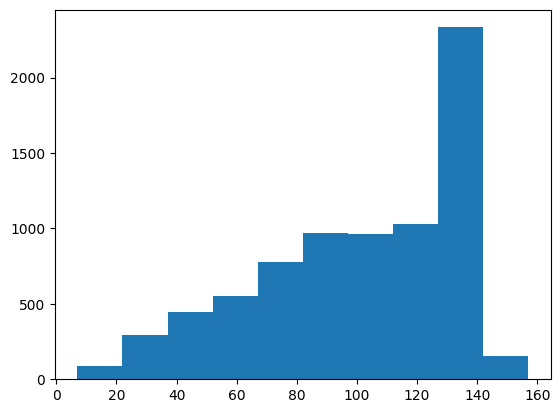

In [11]:
plt.hist(plt_list);

In [12]:
random.choices(train_location , k = 10)

['Trinidad & Tobago',
 nan,
 'Asia European Continent Korea ',
 'The Desert',
 'Quezon City, Philippines',
 'London',
 'Mumbai',
 nan,
 nan,
 nan]

In [13]:
random.choices(train_keyword, k = 10)

['collided',
 'war%20zone',
 'sinking',
 'hijacker',
 'twister',
 'storm',
 'ruin',
 'body%20bags',
 'hijacker',
 'pandemonium']

In [14]:
max_vocab = 10000
output_length = 150

text_vector = layers.TextVectorization(max_tokens = max_vocab , output_sequence_length=output_length )

text_embed = layers.Embedding(max_vocab, 128, mask_zero=True)

text_vector.adapt(train_text)

In [15]:
train_sentences, val_sentences , train_target , val_target = train_test_split(
                                                                train_text,
                                                                train_label,
                                                                test_size = 0.3,
                                                                random_state = 42)

## Creating a dataset for the module

In [16]:
train_dataset_0 = tf.data.Dataset.from_tensor_slices((train_sentences, train_target))
val_dataset_0 = tf.data.Dataset.from_tensor_slices((val_sentences, val_target))


train_dataset_0 = train_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_0 = val_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)


In [17]:
train_dataset_0

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [18]:
train_dataset_0.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

## Creating our first model using simple CNN method

In [19]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vector(inputs)
x = text_embed(x)

x = layers.Conv1D(64, 2, activation = "tanh")(x)


x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64 , activation = "tanh")(x)
x = layers.Dense(64, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_0 = tf.keras.Model(inputs , outputs)

model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 150)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 150, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 149, 64)           16448     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160  

In [20]:
model_0.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_0_history = model_0.fit(train_dataset_0, 
           epochs = 10 ,
           validation_data=val_dataset_0)

Epoch 1/10
167/167 [==============================] - 10s 46ms/step - loss: 0.6832 - accuracy: 0.5772 - val_loss: 0.6540 - val_accuracy: 0.5775
Epoch 2/10
167/167 [==============================] - 7s 41ms/step - loss: 0.4892 - accuracy: 0.7652 - val_loss: 0.5041 - val_accuracy: 0.7859
Epoch 3/10
167/167 [==============================] - 7s 44ms/step - loss: 0.3497 - accuracy: 0.8473 - val_loss: 0.4907 - val_accuracy: 0.8117
Epoch 4/10
167/167 [==============================] - 7s 40ms/step - loss: 0.2762 - accuracy: 0.8891 - val_loss: 0.5288 - val_accuracy: 0.8122
Epoch 5/10
167/167 [==============================] - 7s 42ms/step - loss: 0.2342 - accuracy: 0.9097 - val_loss: 0.6094 - val_accuracy: 0.7964
Epoch 6/10
167/167 [==============================] - 8s 50ms/step - loss: 0.2282 - accuracy: 0.9097 - val_loss: 0.6778 - val_accuracy: 0.7863
Epoch 7/10
167/167 [==============================] - 8s 51ms/step - loss: 0.2177 - accuracy: 0.9077 - val_loss: 0.6055 - val_accuracy: 0.787

In [21]:
train_target

1186    0
4071    1
5461    1
5787    1
7445    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5329, dtype: int64

## Visualizing the model's performance

In [22]:
model_0_preds = model_0.predict(val_dataset_0)
model_0_results = calculate_results(tf.round(model_0_preds), val_target)
model_0_results

72/72 [==============================] - 1s 11ms/step


{'accuracy': 70.00875656742556,
 'precision': 0.7397661357946943,
 'recall': 0.7000875656742557,
 'f1': 0.7005834785893477}

## Creating a character level dataset

In [23]:
train_char_text = [" ".join(list(text.lower())) for text in train_sentences]
val_char_text = [" ".join(list(text.lower())) for text in val_sentences]
test_char_text = [" ".join(list(text.lower())) for text in test_text]


val_char_text


['s o   y o u   h a v e   a   n e w   w e a p o n   t h a t   c a n   c a u s e   u n - i m a g i n a b l e   d e s t r u c t i o n .',
 't h e   f $ & a m p ; @ i n g   t h i n g s   i   d o   f o r   # g i s h w h e s   j u s t   g o t   s o a k e d   i n   a   d e l u g e   g o i n g   f o r   p a d s   a n d   t a m p o n s .   t h x   @ m i s h a c o l l i n s   @ / @',
 'd t   @ g e o r g e g a l l o w a y :   r t   @ g a l l o w a y 4 m a y o r :   \x89 û ï t h e   c o l   p o l i c e   c a n   c a t c h   a   p i c k p o c k e t   i n   l i v e r p o o l   s t r e e . . .   h t t p : / / t . c o / v x i n 1 g o q 4 q',
 'a f t e r s h o c k   b a c k   t o   s c h o o l   k i c k   o f f   w a s   g r e a t .   i   w a n t   t o   t h a n k   e v e r y o n e   f o r   m a k i n g   i t   p o s s i b l e .   w h a t   a   g r e a t   n i g h t .',
 'i n   r e s p o n s e   t o   t r a u m a   c h i l d r e n   o f   a d d i c t s   d e v e l o p   a   d e f e n s i v e   s e l f

In [24]:
train_dataset_1 = tf.data.Dataset.from_tensor_slices((train_char_text, train_target)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_1 = tf.data.Dataset.from_tensor_slices((val_char_text, val_target)).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset_1

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

(array([ 449., 1255., 2072., 2488., 2818.,  643.,  747.,  710., 1658.,
         102.]),
 array([  7. ,  37.6,  68.2,  98.8, 129.4, 160. , 190.6, 221.2, 251.8,
        282.4, 313. ]),
 <BarContainer object of 10 artists>)

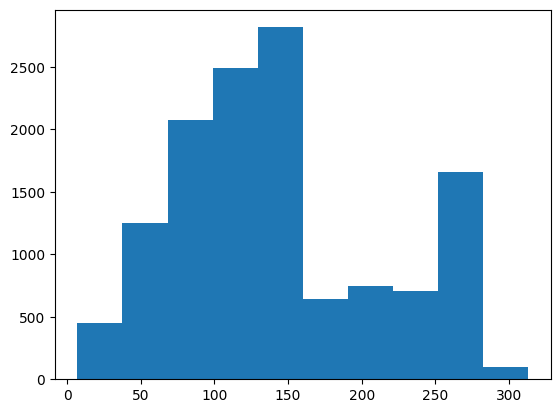

In [25]:
for text in train_char_text:
    plt_list.append(len(text))

plt.hist(plt_list)

In [26]:
char_length = 68

char_vector = layers.TextVectorization(max_tokens = char_length+2 , output_sequence_length=280 )

char_embed = layers.Embedding(char_length+2 , 128, mask_zero= True)

char_vector.adapt(train_char_text)

## Creating a convulation model using character token

In [36]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = char_vector(inputs)
x = char_embed(x)


x = layers.Dense(100,activation = "tanh")(x)
x = layers.Conv1D(264, 5, 2, activation = "tanh")(x)

x = layers.GlobalMaxPool1D()(x)



x = layers.Dense(100,activation = "tanh")(x)
outputs = layers.Dense(1 , activation = "sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 280)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 280, 128)          8960      
                                                                 
 dense_45 (Dense)            (None, 280, 100)          12900     
                                                                 
 conv1d_35 (Conv1D)          (None, 138, 264)          132264    
                                                                 
 global_max_pooling1d_8 (Glo  (None, 264)              0         
 balMaxPooling1D)                                          

In [37]:
model_1.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_1_history = model_1.fit(train_dataset_1, epochs = 10 , validation_data=val_dataset_1)

Epoch 1/10
167/167 [==============================] - 29s 166ms/step - loss: 0.6515 - accuracy: 0.6208 - val_loss: 0.5933 - val_accuracy: 0.6922
Epoch 2/10
167/167 [==============================] - 25s 153ms/step - loss: 0.5450 - accuracy: 0.7251 - val_loss: 0.5333 - val_accuracy: 0.7347
Epoch 3/10
167/167 [==============================] - 27s 161ms/step - loss: 0.4525 - accuracy: 0.7895 - val_loss: 0.5413 - val_accuracy: 0.7268
Epoch 4/10
167/167 [==============================] - 28s 169ms/step - loss: 0.3630 - accuracy: 0.8442 - val_loss: 0.6314 - val_accuracy: 0.6909
Epoch 5/10
167/167 [==============================] - 30s 183ms/step - loss: 0.2652 - accuracy: 0.8996 - val_loss: 0.7356 - val_accuracy: 0.6764
Epoch 6/10
167/167 [==============================] - 27s 163ms/step - loss: 0.2241 - accuracy: 0.9114 - val_loss: 1.1285 - val_accuracy: 0.6878
Epoch 7/10
167/167 [==============================] - 31s 183ms/step - loss: 0.3069 - accuracy: 0.8609 - val_loss: 0.8497 - val_ac

## Visualizing the model's performance

In [ ]:
model_1_preds = model_1.predict(val_char_text)
model_1_preds = tf.round(model_1_preds)

model_1_results = calculate_results(model_1_preds, val_target)

model_1_results

## Creating a Recurrent Neural Network using Character token

In [38]:
inputs = layers.Input(shape = (1, ) , dtype = tf.string)
x = char_vector(inputs)
x = char_embed(x)

x = layers.Dense(100, activation = "tanh")(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

x = layers.Dense(100, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 280)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 280, 128)          8960      
                                                                 
 dense_48 (Dense)            (None, 280, 100)          12900     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_49 (Dense)            (None, 100)               1290

In [ ]:
model_2.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_2_history = model_2.fit(train_dataset_1, epochs = 10 , validation_data=val_dataset_1)

Epoch 1/10
167/167 [==============================] - 104s 555ms/step - loss: 0.6585 - accuracy: 0.6131 - val_loss: 0.6303 - val_accuracy: 0.6401
Epoch 2/10
167/167 [==============================] - 95s 568ms/step - loss: 0.6235 - accuracy: 0.6624 - val_loss: 0.6197 - val_accuracy: 0.6655
Epoch 3/10
167/167 [==============================] - 99s 595ms/step - loss: 0.6127 - accuracy: 0.6812 - val_loss: 0.6160 - val_accuracy: 0.6646
Epoch 4/10
167/167 [==============================] - 101s 604ms/step - loss: 0.6058 - accuracy: 0.6810 - val_loss: 0.6142 - val_accuracy: 0.6651
Epoch 5/10
110/167 [==================>...........] - ETA: 31s - loss: 0.5970 - accuracy: 0.6849